### Test: distribution of xlinks in a tactoid in a given file (2D projections)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fpath = "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq"
simnames = [
    "f1",
    "f1_5",
    "f2",
    "f2_5",
    "f5",
    "f10",
]
simlabels = [
    "Filamin = 1.0",
    "Filamin = 1.5",
    "Filamin = 2.0",
    "Filamin = 2.5",
    "Filamin = 5.0",
    "Filamin = 10.0",
]
fconc = [1,1.5,2,2.5,5,10]
simpaths = [os.path.join(fpath, ii, "result/result0-399/ProteinAscii_6.dat") for ii in simnames]
print( simpaths)

['/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq/f1/result/result0-399/ProteinAscii_6.dat', '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq/f1_5/result/result0-399/ProteinAscii_6.dat', '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq/f2/result/result0-399/ProteinAscii_6.dat', '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq/f2_5/result/result0-399/ProteinAscii_6.dat', '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq/f5/result/result0-399/ProteinAscii_6.dat', '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq/f10/result/result0-399/ProteinAscii_6.dat']


In [3]:
# Protein class
class Protein():
    def __init__(self, pos0, pos1, link0, link1, gid):
        self.pos0 = pos0
        self.pos1 = pos1
        self.link0 = link0
        self.link1 = link1
        self.gid = gid
    def GetCenter(self,boxsize):
        return getMean(self.pos0, self.pos1,boxsize)
    def GetLength(self,boxsize):
        xi = getDistance(self.pos1,self.pos0,boxsize)
        return np.linalg.norm( xi)
    def GetOrientation(self,boxsize):
        if link0 != -1 and link1 != -1:
            xi = self.pos1 - self.pos0
            return xi/np.sqrt( xi.dot(xi))
        else:
            return None

    def Plot3(self,ax,col="blue"):
        ax.plot3D( [self.pos0[0], self.pos1[0]], [self.pos0[1], self.pos1[1]], [self.pos0[2], self.pos1[2]], col)
    def GetStringtoWrite(self):
        return 'P {0} 0 {2:0.6f} {3:0.6f} {4:0.6f} {5:0.6f} {6:0.6f} {7:0.6f} {8} {9} \n'.format(
        self.gid, self.radius,
        self.pos0[0], self.pos0[1], self.pos0[2],
        self.pos1[0], self.pos1[1], self.pos1[2],
        self.link0, self.link1)
    def __repr__(self):
        return "Protein()"
    def __str__(self):
        return 'Protein {0}:\n  pos0: {1}\n  pos1: {2}\n  Links: {3}--{4}'.format(self.gid, self.pos0, self.pos1, self.link0, self.link1)

    
def load_proteins( fpath):
    
    plist = []
    with open(fpath, 'r') as file2:
        filecontent = file2.readlines()
        for line in filecontent:
            if line.startswith('P'):
                data = line.split()
                gid = int(data[1])
                pos0 = np.array([float(data[3]), float(data[4]), float(data[5])])
                pos1 = np.array([float(data[6]), float(data[7]), float(data[8])])
                link0 = int(data[9])
                link1 = int(data[10])
                plist.append( Protein(pos0, pos1, link0, link1, gid))

    return plist

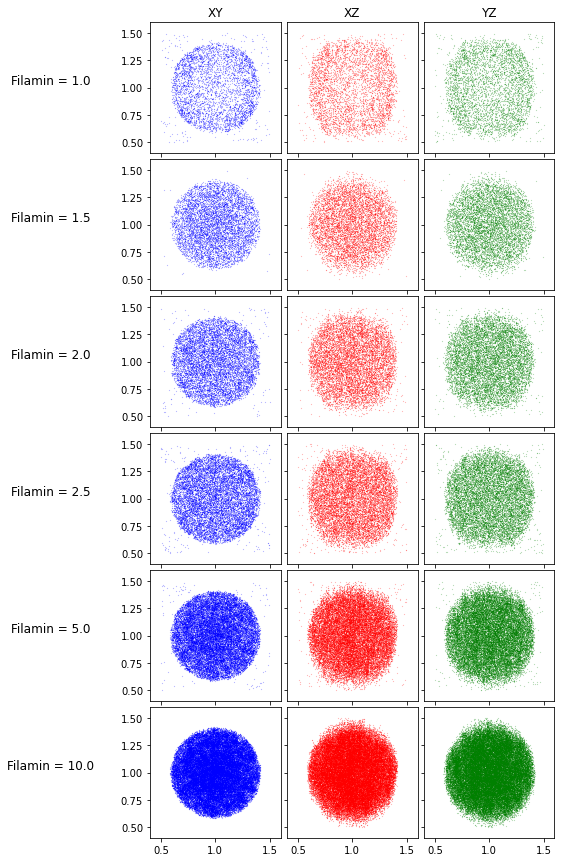

In [7]:
# Plot all xyz coordinates of xlink centers
fig, axs = plt.subplots( len(simpaths),3, figsize=(9,2.5*len(simpaths)), sharex=True, sharey=True)
plt.subplots_adjust(wspace=-0.4, hspace=0.05)
for idx in range(len(simpaths)):
    
    plist = load_proteins(simpaths[idx])
    nP = len(plist)

    # filament centers
    c = np.zeros( (nP,3))
    for jf in range(nP):
        c[jf,:] = (plist[jf].pos0 + plist[jf].pos1)/2
    
    axs[idx,0].plot(c[:,0], c[:,1], 'bo', markersize=0.1)
    axs[idx,1].plot(c[:,0], c[:,2], 'ro', markersize=0.1)
    axs[idx,2].plot(c[:,1], c[:,2], 'go', markersize=0.1)
    
for ax in axs.flatten():
    ax.set(xlim=[0.4,1.6],ylim=[0.4,1.6])
    ax.set_aspect('equal', 'box')

cols = ['XY','XZ','YZ']
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], simlabels):
    ax.set_ylabel(row, rotation=0, size='large',labelpad=70)
#fig.savefig('/Users/saadjansari/Desktop/tactoid_xlink_initial_dist.jpg', dpi=150, bbox_inches='tight')

### Number of doubly-bound xlinks

[[<matplotlib.axis.XTick at 0x12012adf0>,
 [Text(0, 0, '1'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2'),
  Text(3, 0, '2.5'),
  Text(4, 0, '5'),
  Text(5, 0, '10')]]

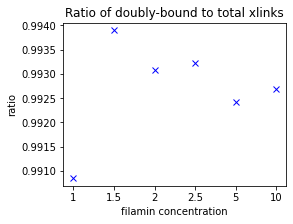

In [5]:
# Plot ratio of doubly bound xlinkers
fig, ax = plt.subplots( figsize=(4,3))
ratio_doubly = []
for idx in range(len(simpaths)):
    
    plist = load_proteins(simpaths[idx])
    nP = len(plist)

    # number of doubly bound xlinks
    nP_db = 0
    for jf in range(nP):
        if plist[jf].link0 != -1 and plist[jf].link1 != -1:
            nP_db+=1
    ratio_doubly.append(nP_db/nP)
ax.plot(ratio_doubly,'bx')
# ax.set(ylim=[-0.1,1.1])
ax.set(ylabel='ratio', xlabel='filamin concentration',title='Ratio of doubly-bound to total xlinks')
ax.set(xticks=[0,1,2,3,4,5],xticklabels=['1','1.5','2','2.5','5','10'])
#fig.savefig('/Users/saadjansari/Desktop/tactoid_xlink_initial_doublybound.jpg', dpi=300, bbox_inches='tight')